## **Machine Learning Project** - Cesare Bergossi
The goal of this project is to compare the performance of a Support Vector Machine with that of Logistic Regression, on a randomly generated dataset. The dataset is composed of 1100 samples with 20 features each. The first column is the sample id. The second column in the dataset represents the label. There are 5 possible values for the labels. \
Finally, we will try to optimize both algorithms' parameters and determine which one is best for this dataset.

### Importing Useful Libraries

In [2]:
import pandas as pd
import numpy as np
import random
import sklearn.feature_selection as fs
from scipy.stats import kurtosis, skew
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## **Exploratory Data Analysis (EDA)**

### Data Loading
Before training and testing our model, it is important to understand which kind of data we have to deal with. \
Hence, we will load our dataset and check some common characteristics (such as displaying the first few rows, the dimension of the dataset, etc.)

In [3]:
data = pd.read_csv('ML_Dataset.csv')

In [4]:
data.head()

,Unnamed: 0,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20
0,0,1,0.564232,-0.475689,-0.624867,-1.958738,1.647103,-0.960201,1.333077,0.521005,...,-0.942770,-0.830773,0.561956,2.706882,-1.513428,-2.509832,0.216847,1.051487,1.482076,0.202139
1,1,4,-1.719455,-2.456545,-0.329957,-0.696814,-0.692750,-0.410249,-0.161732,0.067852,...,-0.038946,2.479158,-0.858796,0.135117,0.699460,-0.154732,-1.213017,2.499571,-0.837152,0.424902
2,2,4,1.861901,-3.663427,0.937905,-1.359811,1.185561,1.000833,-0.518793,0.117492,...,1.054547,1.420989,-1.231317,-1.063609,0.753716,0.846578,1.774505,3.601787,-2.185917,0.822411
3,3,1,0.814556,-2.805393,-0.441724,0.052546,-0.182044,-0.673110,-1.004687,-1.379117,...,-0.441137,-0.626657,-3.105566,4.134364,-1.977913,-2.039072,-2.468660,4.726132,-0.051053,0.473159
4,4,1,3.777595,-0.776902,-0.956034,0.102590,1.026694,-0.092593,-0.084798,2.163465,...,-1.854633,0.104032,1.644912,0.654601,1.785506,0.936334,-0.448566,1.705283,1.301148,-0.878542


In [5]:
data.columns

Index(['Unnamed: 0', 'label', 'feature_1', 'feature_2', 'feature_3',
       'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8',
       'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13',
       'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18',
       'feature_19', 'feature_20'],
      dtype='object')

We will now proceed by separating features and labels, and then printing the different labels of the samples.

In [6]:
features = data.iloc[:, 2:]
labels = data.iloc[:, 1]

sorted(labels.unique())


[0, 1, 2, 3, 4]

From this, we can see that we have five distinct numerical labels. \
Now that we have stored the labels in a variable, we can use "features" as our new dataset (without the first two columns "Sample ID" and "Label") and use the "describe" function to get useful statistical insights about the dataset.

In [7]:
features.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,-0.146377,0.103337,0.127338,0.019512,0.097956,0.084656,0.091221,-0.419407,0.091314,0.124548,0.326213,-0.053066,0.173586,-0.078295,-0.307194,0.022829,0.118125,0.495851,0.065512,0.047034
std,2.218302,2.244576,0.976878,2.219821,0.974504,0.975259,1.010093,2.139736,0.988759,0.969530,2.011403,2.139600,2.229348,2.453137,2.274810,2.188898,1.045291,2.155753,2.317137,1.032659
min,-7.882054,-7.732495,-2.681136,-7.472894,-2.920040,-3.204677,-3.146606,-7.037403,-2.980856,-2.520906,-6.806027,-6.346063,-7.195336,-7.159248,-8.089201,-7.247534,-4.056092,-6.226755,-7.298997,-2.620665
25%,-1.559740,-1.395533,-0.513037,-1.544492,-0.551272,-0.547852,-0.558153,-1.908273,-0.578393,-0.516214,-1.038386,-1.429084,-1.265265,-1.789842,-1.881390,-1.429347,-0.552415,-0.934948,-1.567172,-0.638916
50%,-0.234776,0.076874,0.148440,0.105396,0.067485,0.090418,0.086042,-0.429539,0.118200,0.119758,0.418332,-0.151015,0.195545,-0.096506,-0.432441,-0.025539,0.150744,0.539809,0.065082,0.040368
75%,1.415067,1.597101,0.768467,1.569407,0.761285,0.738885,0.750395,1.168313,0.773239,0.745025,1.701108,1.399952,1.620505,1.515188,1.127581,1.497782,0.774340,1.950875,1.596351,0.763385
max,8.265892,7.612638,3.380622,7.149454,3.329443,3.746885,3.136544,6.657921,3.253577,3.455699,6.794578,6.616215,8.167799,7.600420,7.361092,6.710129,3.894919,7.409684,8.870475,3.256960


In [8]:
print('Number of Samples:', features.shape[0])
print('Number of Features:', features.shape[1])

Number of Samples: 1100
Number of Features: 20


### Missing Values and Duplicate Rows
Other analysis techniques include checking for missing values or duplicate rows (as the number of samples is very high, human error might arise).

In [9]:
print(features.isnull().sum())
print(labels.isnull().sum())

feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
feature_17    0
feature_18    0
feature_19    0
feature_20    0
dtype: int64
0


In [10]:
duplicate_rows_tot = features.duplicated(keep=False).sum()
print(f"There are {duplicate_rows_tot} duplicate rows.")

There are 0 duplicate rows.


### Proportion of Labels
Understanding if the distribution of our target variable is balanced across the dataset is particularly important in classification problems, as it might already help identifying issues or specific patterns.

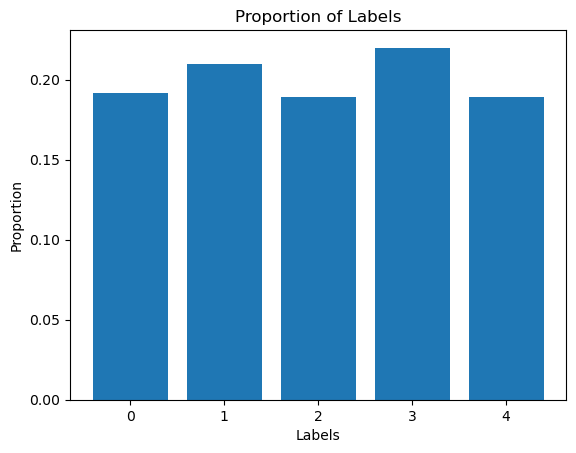

In [11]:
label_counts = labels.value_counts()
label_proportions = label_counts / len(labels)

fig, ax = plt.subplots()
ax.bar(label_proportions.index, label_proportions.values)
ax.set_xlabel('Labels')
ax.set_ylabel('Proportion')
ax.set_title('Proportion of Labels')

plt.show()


From the histogram, we can evince that the labels are balanced among the samples.

### Near-zero Variance
Let us check if there are features with non-zero variance: that would mean that every sample has the same value for that specific feature, therefore they do not bring any additional information.

In [12]:
# Define a threshold for near-zero variance
threshold = 0.0

selector = fs.VarianceThreshold(threshold)
selector.fit(features)

# Get boolean mask of features that meet threshold
mask = selector.get_support()

near_zero_var_cols = features.columns[~mask].tolist()

if near_zero_var_cols == []: 
    print('Columns with near-zero variance: None')
else: 
    print('Columns with near-zero variance:', near_zero_var_cols)

Columns with near-zero variance: None


### Outliers
Outliers can have a disproportionate influence on the estimation of the logistic regression model's coefficients. \
We can try to identify the outliers in our dataset by computing the interquartile range, which involves calculating the difference between the 75th and 25th percentile of the data. Any data point that falls outside the range of 1.5 times the interquartile range below the 25th percentile or above the 75th percentile is considered an outlier. \
We can then try to remove these outliers from our dataset and analyze the result.

In [13]:
Q1 = features.quantile(0.25)
Q3 = features.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

feature_1     2.974807
feature_2     2.992633
feature_3     1.281503
feature_4     3.113898
feature_5     1.312558
feature_6     1.286737
feature_7     1.308548
feature_8     3.076586
feature_9     1.351632
feature_10    1.261239
feature_11    2.739494
feature_12    2.829036
feature_13    2.885770
feature_14    3.305030
feature_15    3.008971
feature_16    2.927129
feature_17    1.326755
feature_18    2.885823
feature_19    3.163524
feature_20    1.402301
dtype: float64


A violin plot can be useful in this case because it provides a more informative visualization of the distribution of feature values than a simple box plot.

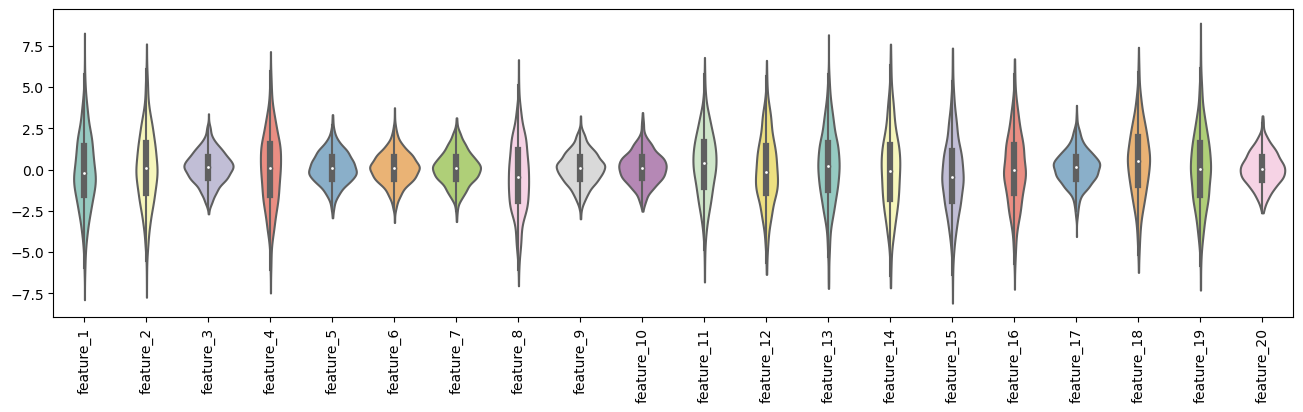

In [14]:
plt.figure(figsize=(16,4))
violin_plot = sns.violinplot(data=features, palette="Set3", cut=0)
plt.setp(violin_plot.get_xticklabels(), rotation=90)
plt.show()

Let us attempt to remove outliers using the interquartile range technique.

In [15]:
df_no_out = features[~((features < (Q1 - 1.5 * IQR)) |(features > (Q3 + 1.5 * IQR))).any(axis=1)]
df_no_out.shape

(944, 20)

We also remove them from the full dataset (with Sample ID and Labels).

In [16]:
outlier_removed_indices = df_no_out.index

df_full = data.loc[outlier_removed_indices]
df_full.shape


(944, 22)

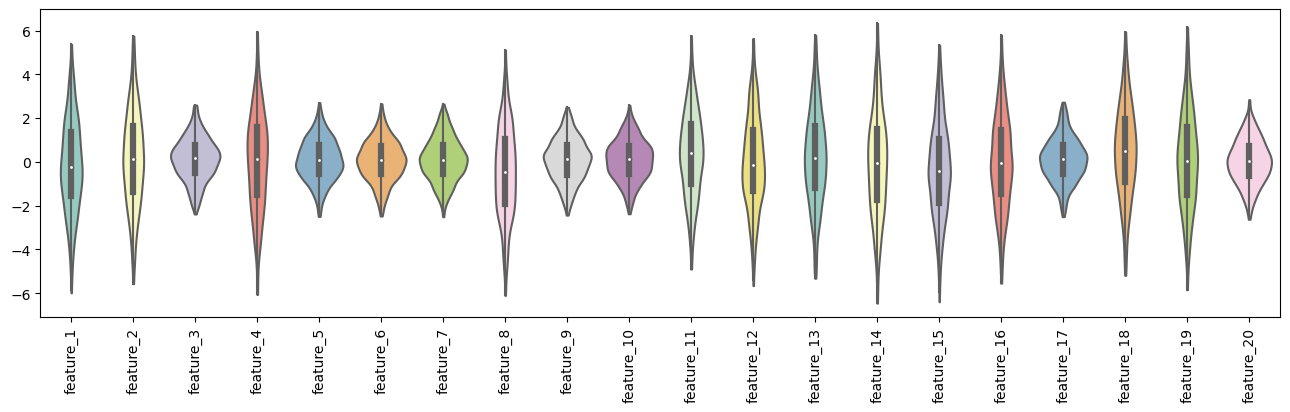

In [17]:
plt.figure(figsize=(16,4))
violin_plot = sns.violinplot(data=df_no_out, palette="Set3", cut=0)
plt.setp(violin_plot.get_xticklabels(), rotation=90)
plt.show()

From 1100 samples, we are left with 944, removing more than 150 outliers which could have interfered with our model. Moreover, from the violinplots we can see how discarding the outliers did not remove important information from the dataset.

### Correlation
Absence of multi-collinearity is required for logistic regression, hence we should now investigate correlation between features.


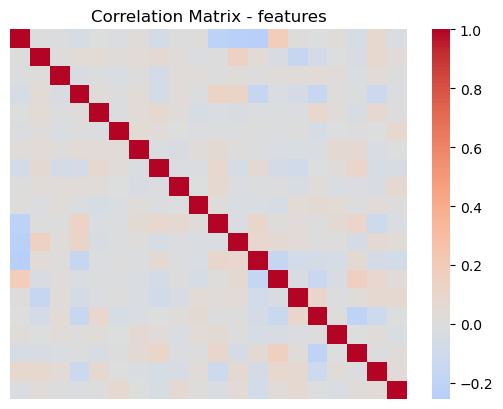

In [18]:
corr_matrix = df_no_out.corr()

sns.heatmap(corr_matrix, cmap="coolwarm", center=0, xticklabels=False, yticklabels=False)
midpoint = (corr_matrix.values.max() - corr_matrix.values.min()) /2 + corr_matrix.values.min()
plt.title("Correlation Matrix - features")
plt.show()

Cooler tones reveal that correlation between every pair of (distinct) features is almost null.

### Distribution
Analyzing the distribution is particularly important when dealing with supervised learning models. In particular, we will investigate a potential normal distribution of our data, as normality performs better on some regression models and ensures that features are on a similar scale. \
\
To do that, we compute skewness and kurtosis values, which represent respectively the degree of asymmetry and peakedness in the distribution; we then compare them to the corresponding values for a normal distribution.

In [19]:
data_flat = pd.Series(df_no_out.values.flatten())
skew_matrix = skew(data_flat)
kurtosis_matrix = kurtosis(data_flat)
print("Skewness of dataset: ", round(skew_matrix, 3))
print("Kurtosis of dataset: ", round(kurtosis_matrix, 3))

Skewness of dataset:  -0.028
Kurtosis of dataset:  0.598


Skewness is really close to zero, indicating an almost perfectly symmetrical distribution. Kurtosis, however, is slightly closer to 1, so we expect it to be more peaked compared to a normal distribution.

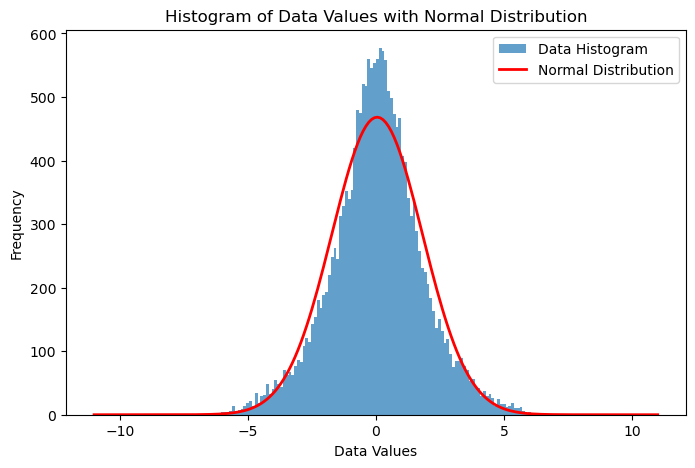

In [20]:
from scipy.stats import norm

data_flattened = pd.Series(df_no_out.values.flatten())

fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(data_flattened, range=[-11, 11], bins=200, alpha=0.7, label='Data Histogram')

mean = np.mean(data_flattened)
std = np.std(data_flattened)

x = np.linspace(-11, 11, 200)
y = norm.pdf(x, mean, std) * len(data_flattened) * (11 + 11) / 200

ax.plot(x, y, 'r', linewidth=2, label='Normal Distribution')

ax.set_xlabel('Data Values')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Data Values with Normal Distribution')
ax.legend()

plt.show()


As expected, the distribution of our dataset is just narrowly more peaked than a normal distribution. \
Mean and standard deviation should be checked to see if, moreover, the distribution is standardized.

In [21]:
df_no_out.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,-0.148289,0.143413,0.134117,0.019154,0.093051,0.064620,0.114954,-0.451218,0.092284,0.103688,0.361938,-0.016913,0.200374,-0.070292,-0.326996,-0.024019,0.110917,0.480154,0.064454,0.024746
std,2.098024,2.171146,0.968058,2.174918,0.952596,0.939501,0.974426,2.059222,0.971517,0.932366,1.927073,2.074620,2.130712,2.344419,2.126633,2.103352,0.988073,2.110352,2.203448,1.015078
min,-5.979858,-5.564032,-2.379659,-6.056718,-2.492410,-2.472737,-2.507063,-6.098137,-2.432100,-2.370138,-4.894407,-5.652258,-5.314400,-6.452973,-6.390455,-5.540334,-2.500900,-5.182393,-5.839553,-2.620665
25%,-1.548500,-1.387796,-0.494150,-1.534600,-0.562019,-0.556318,-0.538653,-1.911961,-0.584533,-0.533090,-1.017715,-1.344743,-1.209489,-1.743108,-1.864866,-1.487255,-0.544231,-0.906671,-1.519524,-0.655157
50%,-0.212338,0.137015,0.154446,0.131529,0.064481,0.075938,0.105082,-0.458545,0.131508,0.115588,0.409210,-0.141754,0.183590,-0.062226,-0.435338,-0.066659,0.113040,0.516247,0.040919,0.025663
75%,1.350500,1.646251,0.756636,1.572569,0.765439,0.726746,0.768783,1.053446,0.790432,0.727322,1.711198,1.439550,1.621621,1.488920,1.048584,1.452819,0.760443,1.939129,1.575326,0.734992
max,5.370569,5.746444,2.591758,5.948256,2.706884,2.653473,2.638784,5.113431,2.489985,2.589054,5.764199,5.639673,5.786279,6.335855,5.340785,5.792738,2.725001,5.941329,6.160184,2.844194


The mean of every feature is indeed really close to 0. However, standard deviation is not always 1, so we should consider using a standard scaler before proceeding further.

In [22]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_no_out)
df = pd.DataFrame(scaled_data, columns=df_no_out.columns)

In [23]:
df.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20
count,9.440000e+02,9.440000e+02,9.440000e+02,9.440000e+02,9.440000e+02,9.440000e+02,9.440000e+02,9.440000e+02,9.440000e+02,9.440000e+02,9.440000e+02,9.440000e+02,9.440000e+02,9.440000e+02,9.440000e+02,9.440000e+02,9.440000e+02,9.440000e+02,9.440000e+02,9.440000e+02
mean,1.058475e-18,5.645202e-17,-2.313945e-17,1.470105e-17,3.022535e-17,-7.409327e-18,4.316227e-17,4.498520e-17,-8.114978e-18,-3.951641e-17,6.497863e-18,4.586726e-18,2.340407e-17,2.963731e-17,3.492969e-17,2.540341e-17,-1.575952e-17,2.340407e-17,-3.281274e-17,-1.181964e-17
std,1.000530e+00,1.000530e+00,1.000530e+00,1.000530e+00,1.000530e+00,1.000530e+00,1.000530e+00,1.000530e+00,1.000530e+00,1.000530e+00,1.000530e+00,1.000530e+00,1.000530e+00,1.000530e+00,1.000530e+00,1.000530e+00,1.000530e+00,1.000530e+00,1.000530e+00,1.000530e+00
min,-2.781026e+00,-2.630164e+00,-2.598096e+00,-2.795090e+00,-2.715559e+00,-2.702181e+00,-2.692259e+00,-2.743712e+00,-2.599773e+00,-2.654685e+00,-2.729078e+00,-2.717766e+00,-2.589603e+00,-2.723943e+00,-2.852713e+00,-2.624020e+00,-2.644745e+00,-2.684646e+00,-2.680861e+00,-2.607497e+00
25%,-6.677489e-01,-7.056278e-01,-6.493410e-01,-7.147750e-01,-6.880323e-01,-6.612729e-01,-6.711166e-01,-7.097424e-01,-6.970298e-01,-6.833318e-01,-7.163116e-01,-6.403744e-01,-6.620372e-01,-7.139096e-01,-7.235311e-01,-6.960372e-01,-6.634071e-01,-6.575014e-01,-7.192443e-01,-6.701583e-01
50%,-3.054449e-02,-2.948335e-03,2.101031e-02,5.169630e-02,-3.000725e-02,1.205349e-02,-1.013588e-02,-3.560152e-03,4.039584e-02,1.277066e-02,2.454355e-02,-6.020729e-02,-7.881430e-03,3.442228e-03,-5.097233e-02,-2.028293e-02,2.150401e-03,1.711176e-02,-1.068665e-02,9.041730e-04
75%,7.147597e-01,6.925538e-01,6.434005e-01,7.146196e-01,7.062217e-01,7.051375e-01,6.713450e-01,7.310825e-01,7.189977e-01,6.692269e-01,7.005313e-01,7.024107e-01,6.673828e-01,6.654262e-01,6.471777e-01,7.025074e-01,6.577150e-01,6.917083e-01,6.860491e-01,7.000666e-01
max,2.631897e+00,2.582048e+00,2.540078e+00,2.727572e+00,2.745359e+00,2.757022e+00,2.591442e+00,2.703739e+00,2.469307e+00,2.667068e+00,2.804837e+00,2.728010e+00,2.623005e+00,2.733957e+00,2.666557e+00,2.766936e+00,2.647041e+00,2.589175e+00,2.767917e+00,2.779039e+00


Now, every feature has the right mean and standard deviation to be considered standard normal: "df" is our final preprocessed dataframe which we will use in supervised learning.

### Data Visualization
To get a first impression on how features and labels are related, it can be useful to plot data points. Here, we select three random features and use them as main components for a 3D visualization; different colors correspond to distinct labels.

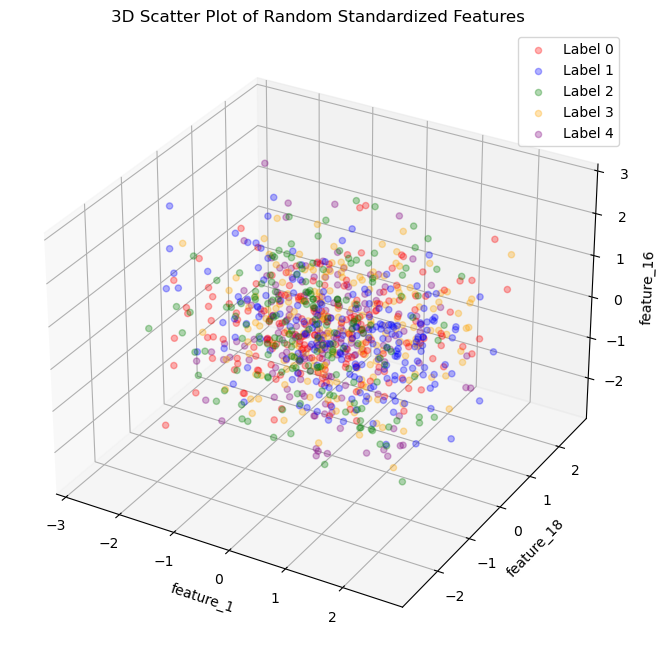

In [24]:
# Align the indices between 'df' and 'df_full'
df_full = df_full.set_index(df.index)

np.random.seed(42) 
random_features = np.random.choice(df.columns, size=3, replace=False)

label_colors = ['red', 'blue', 'green', 'orange', 'purple']
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel(random_features[0])
ax.set_ylabel(random_features[1])
ax.set_zlabel(random_features[2])
ax.set_title('3D Scatter Plot of Random Standardized Features')

for label in range(5): 
    label_data = df_full[df_full.iloc[:, 1] == label]
    ax.scatter(df.loc[label_data.index, random_features[0]], df.loc[label_data.index, random_features[1]],
               df.loc[label_data.index, random_features[2]], alpha=0.3, c=label_colors[label], label=f'Label {label}')

ax.legend()

plt.show()

Choosing three random components, our data definitely looks not linearly separable. However, we can get even more evidence by choosing features which explain most of the variance in the samples, using PCA.

### PCA (Principal Component Analysis)
By using PCA, we can select features based on the amount of information that they carry. Then, we can visually check if labels are more easily separable on the main features.

In [25]:
pca = PCA(n_components = 0.90)
df_pca = pca.fit_transform(df)
pca.explained_variance_ratio_

array([0.08129691, 0.07194249, 0.06505965, 0.06324663, 0.06176273,
       0.05675063, 0.05574151, 0.05357434, 0.05231038, 0.04998957,
       0.04736387, 0.04627067, 0.04471452, 0.04342201, 0.04228384,
       0.04008639, 0.03773562])

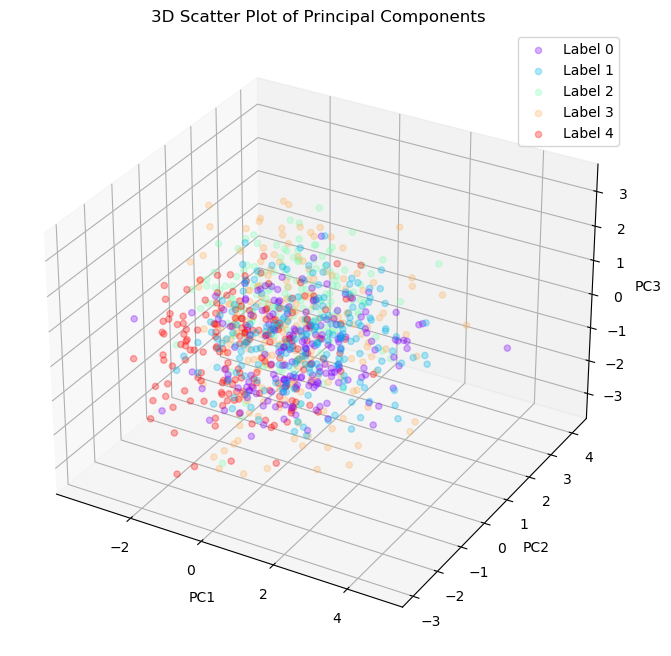

In [26]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D Scatter Plot of Principal Components')

labels = df_full.iloc[:, 1]
unique_labels = np.unique(labels)
label_colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, label_colors):
    label_data = df_pca[labels == label]
    ax.scatter(label_data[:, 0], label_data[:, 1], label_data[:, 2], color=color, alpha=0.3, label=f'Label {label}')

ax.legend()

plt.show()

Still, not a great plot on these components. Non-linear separability of data implies that SVM (in its linear version) and Logistic Regression may struggle to accurately classify the data. \
Also note that with the common choice of 90% explained variance, PCA chose 17 components, all of which have more or less the same amount of variance; hence, PCA would not be that useful to reduce dimensionality.

## **Unsupervised Learning**

In this section, we will compare the performance of two unsupervised learning techniques: SVM (Support Vector Machine) and Logistic Regression. \
We begin the training by splitting our dataset into training and testing sets (using the standard 80-20 proportion).

In [27]:
X = df
y = df_full.iloc[:, 1] # Labels of preprocessed df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (755, 20) (755,)
Testing set shape: (189, 20) (189,)


### **SVM (Support Vector Machine)**

The version of Support Vector Machine that we are going to use is "LinearSVC", a linear version of the more general SVC (Support Vector Classification) algorithm.

In [29]:
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

svm_predictions = svm_model.predict(X_test)

svm_accuracy = accuracy_score(y_test, svm_predictions)
print("Support Vector Machine (SVM) Accuracy:", svm_accuracy)

Support Vector Machine (SVM) Accuracy: 0.4497354497354497


This result can be improved by trying to find the best set of hyperparameters for the algorithm. \
The technique used below is Grid Search Cross-Validation, which is more time consuming compared to its randomized version (RandomizedSearchCV), but continuously looks for the parameters (among a list of given parameters) until the optimal subset is found. \
Note that in this case (and as we will see in logistic regression as well) the running time is not extremely high (hence the choice of Grid Search), however in more complex models, for instance non-linear SVM, this could be much more computationally expensive.

In [30]:
# Defining a dictionary of parameter grids for SVM
svm_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'loss': ['squared_hinge', 'hinge'], 'fit_intercept': ['True', 'False']}

svm_grid_search = GridSearchCV(LinearSVC(), svm_param_grid, scoring='accuracy', verbose=1, cv=10)
svm_grid_result = svm_grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


In [31]:
# Retrieving the best SVM model and its parameters
best_svm_model = svm_grid_result.best_estimator_
best_svm_params = svm_grid_result.best_params_

# Evaluating the performance of the best SVM model
svm_opt_predictions = best_svm_model.predict(X_test)
svm_opt_accuracy = accuracy_score(y_test, svm_opt_predictions)
print("Best SVM Accuracy:", svm_opt_accuracy)
print("Best SVM Parameters:", best_svm_params)

Best SVM Accuracy: 0.455026455026455
Best SVM Parameters: {'C': 0.001, 'fit_intercept': 'True', 'loss': 'hinge', 'penalty': 'l2'}


Through cross validation, the following parameters were selected: regularization parameter C = 10, fit_intercept = False (meaning that the model does not include the intercept term), squared_hinge as loss function, and L2 regularization, i.e. ridge regularization. \
The best accuracy for Linear SVM has slightly improved using Grid Search Cross-Validation, but having an accuracy below 50% is not surprising since we have already seen that our data is not linearly separable.

### **Logistic Regression**
Logistic regression is generally used for binary classification problems. However, it can also be extended to handle multi-class classification problems, for instance our case where we have five labels.

In [32]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

logreg_predictions = logreg_model.predict(X_test)

logreg_accuracy = accuracy_score(y_test, logreg_predictions)
print("Logistic Regression Accuracy:", logreg_accuracy)

Logistic Regression Accuracy: 0.43915343915343913


As we have done previously with SVM, we try to find the best parameters through Grid Search CV.

In [33]:
# Defining a dictionary of parameter grids for Logistic Regression
logreg_param_grid = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}

logreg_grid_search = GridSearchCV(LogisticRegression(), logreg_param_grid, scoring='accuracy', verbose=1, cv=10)
log_grid_result = logreg_grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 84 candidates, totalling 840 fits


In [34]:
# Retrieving the best Logistic Regression model and its parameters
best_logreg_model = log_grid_result.best_estimator_
best_logreg_params = log_grid_result.best_params_

# Evaluating the performance of the best Logistic Regression model
logreg_opt_predictions = best_logreg_model.predict(X_test)
logreg_opt_accuracy = accuracy_score(y_test, logreg_opt_predictions)
print("Best Logistic Regression Accuracy:", logreg_opt_accuracy)
print("Best Logistic Regression Parameters:", best_logreg_params)

Best Logistic Regression Accuracy: 0.48677248677248675
Best Logistic Regression Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}


This time we had a fair improvement in the accuracy, with parameters C = 0.1, l1 regularization (i.e. Lasso regularization), and 'saga' solver algorithm, a variant of stochastic average gradient descent solver. \
Logistic Regression is a linear model, so as predicted for SVM, its accuracy is fairly low on our dataset.

After this analysis, we found that the best accuracy between SVM and Logistic Regression is achieved by the latter, despite the relatively small difference.

## **Model Evaluation**
Once we have found the best accuracies and parameters for both SVM and Logistic Regression, we can proceed with a deeper analysis of our model, which extends further than accuracy scores. We will compare these results for both models, before and after selecting parameters with Grid Search.

### Confusion Matrix
A confusion matrix provides a graphic representation of the predicted labels against the actual labels. It helps in assessing the performance of the model in terms of true positives, true negatives, false positives, and false negatives.

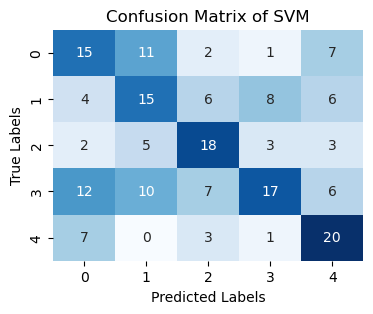

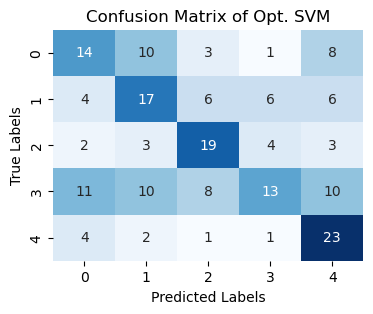

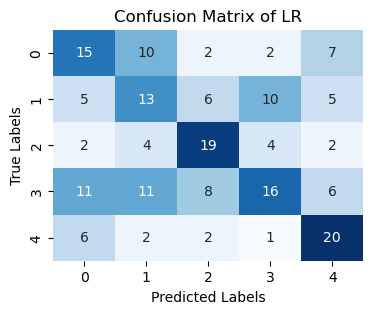

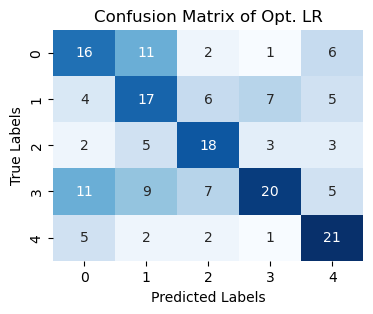

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_svm = confusion_matrix(y_test, svm_predictions)
cm_svm_opt = confusion_matrix(y_test, svm_opt_predictions)
cm_logreg = confusion_matrix(y_test, logreg_predictions)
cm_logreg_opt = confusion_matrix(y_test, logreg_opt_predictions)

names_list = ['SVM', 'Opt. SVM', 'LR', 'Opt. LR']
for i, cm in enumerate([cm_svm, cm_svm_opt, cm_logreg, cm_logreg_opt]):
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
    plt.title(f"Confusion Matrix of {names_list[i]}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

The diagonal (top-left to bottom-right) shows a good number of true positives (the predicted label matches the true label), meaning that our models are not extremely bad. Be that as it may, there is still a fair amount of misclassified samples. \
From these confusion matrices, logistic regression with optimal parameters has slightly better results.

### **Precision, Recall, and F1-Score**
These metrics provide insights into the model's performance in terms of precision (ability to correctly identify positive instances), recall (ability to capture all positive instances), and the F1-score (a harmonic mean of precision and recall).

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_list = []
recall_list =[]
f1_list = []
for pred in [svm_predictions, svm_opt_predictions, logreg_predictions, logreg_opt_predictions]:
    precision_list.append(round(precision_score(y_test, pred, average='macro'), 4))
    recall_list.append(round(recall_score(y_test, pred, average='macro'), 4))
    f1_list.append(round(f1_score(y_test, pred, average='macro'), 4))


print(f"Precision: {precision_list}")
print(f"Recall: {recall_list}")
print(f"F1-score: {f1_list}")

Precision: [0.4567, 0.4597, 0.4416, 0.4943]
Recall: [0.4708, 0.4859, 0.4632, 0.5046]
F1-score: [0.4539, 0.4557, 0.4456, 0.4911]


Again, opt. logistic regression achieves better scores compared to other models.

### **ROC AUC Score**
The ROC AUC score measures the model's ability to distinguish between the positive and negative samples: it represents the probability that a randomly chosen positive sample will be ranked higher than a randomly chosen negative sample by the classification model.

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

roc_auc_list = []
for model_log in [logreg_model, best_logreg_model]:
    roc_auc_list.append(round(roc_auc_score(y_test, model_log.predict_proba(X_test), multi_class='ovr'), 4))

for model_svm in [svm_model, best_svm_model]:
    y_test_encoded = label_binarize(y_test, classes=np.unique(y_test))
    roc_auc_list.append(round(roc_auc_score(y_test_encoded, model_svm.decision_function(X_test), average='macro'), 4))
print(f"ROC AUC scores: {roc_auc_list}")

ROC AUC scores: [0.7571, 0.7757, 0.7534, 0.7483]


Even the ROC AUC scores show once again that logistic regression is performing better than SVM.

## **Conclusion**
Summarizing, we first analyzed our dataset and removed outliers, after finding out that they were not carrying the greatest part of information in the data. \
We then controlled the correlation between features to ensure absence of multi-collinearity and investigated the distribution of the data, discovering that they are normally distributed with zero mean, but not standardized. \
Using a standard scaler, we finally obtained a satisfactory enough dataframe, so we proceeded with some 3D visualization, finding out that labels are not perfectly linearly separable with respect to the main features. \
\
After all this preprocessing, we finally trained our model with SVM (linear) and Logistic Regression. For both models, we selected optimal parameters through Grid Search Cross-Validation, and afterwards we employed a diverse array of methodologies to determine the best model. \
In conclusion, **logistic regression** emerged as the optimal model, with parameters ``` {C = 0.1, penalty = l1, solver = saga} ```. \
\
Nevertheless, the accuracy of logistic regression on predicting labels on this dataset yielded unsatisfactory results, with only less than 50% of accuracy. Why is that? \
Logistic regression has several assumptions on the dataset: we were able to confirm some of those, for example eliminating outliers, which could have lead to biased results, or having no multi-collinearity between features. \
However, as we checked graphically, the data is messy and not linearly separable; moreover, even if logistic regression can be implemented to solve multiclass problems, it achieves its highest accuracy in binary classification. \
Due to non-linear separability, also Linear SVM performed poorly: to address this issue, further research could be based on comparing the performance of a general support vector machine (i.e. using kernels to tackle the issue of non-linearly separable data) against a Multinomial Logistic Regression, which handles the problem of multiple labels in a different way.

## **Final Predictions**

In [ ]:
df_test = pd.read_csv('ML_Test.csv')

X_final_test = df_test.iloc[:, 1:]
X_final_test_scaled = scaler.fit_transform(X_final_test)
X_final = pd.DataFrame(X_final_test_scaled, columns = X_final_test.columns)
X_final.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20
0,-0.449992,0.172650,-0.346329,0.304811,0.139250,2.129381,-0.181422,-1.272980,1.388973,0.473510,-0.410016,-0.888804,0.321074,1.571529,0.569050,-0.011759,-0.434281,-0.525002,0.923109,0.321513
1,-0.004599,-0.515677,-0.298617,-0.439539,-1.058870,-0.354832,-0.594551,-0.261209,-0.679453,-1.111886,0.882222,-0.843928,-0.456176,-0.717936,-0.503396,-0.759375,-0.512185,-0.600097,-0.439015,1.435480
2,1.543999,0.077744,0.643993,-0.390100,-1.312246,0.439892,0.250059,-1.586655,-1.469438,0.115140,-0.624842,-0.748123,0.388992,0.195916,-0.582831,-0.497332,-0.811689,-0.703129,1.405752,-0.134936
3,-0.618694,-1.355762,-0.163333,2.710016,-1.057518,0.838496,2.415196,-1.364109,0.002551,1.117269,-1.639576,-1.619974,-2.365376,-0.100547,-0.588896,-1.546554,0.384300,0.432448,-1.374685,0.435096
4,-0.918989,-0.228575,-2.459451,-0.749127,-0.402962,-0.553921,1.823942,0.606276,0.649111,-1.835346,0.420926,-1.246130,1.946047,-0.656321,1.676918,1.178677,1.393312,0.372567,1.677182,-0.349007


In [ ]:
final_predictions = best_logreg_model.predict(X_final)
print(final_predictions)

[3 2 3 ... 2 2 4]


In [ ]:
with open('Final_Predictions.txt', 'w') as file:
    for i in final_predictions:
        file.write('%s\n' % i)